# **Detect Solar Panels**
<font size=2>Haoran Zhang,Huazhong University of Science and Technology

email: u201916457@hust.edu.cn
</font>

---
Please open this document in Colabortory in case that some python packages in your computer are not suitable for this project. 

Here is an introduction about my work about GEARS 2021-Summer.

# Content
1. Begin
2. Method 1: Use Haar Cascade Classifier
3. Method 2: Use cvlib to detect(YOLOv3 model)
4. Method 3: Use GoogLeNet model(from Professor Majed)
5. Method 4: Find contours directly(best to use in farm)
6. Method 5: Train CNN and some useful github project
7. Discussion and Conclusion




# Begin
When I started the project, I'm still a newbee to Computer Vision. Professor Majed gave me many help. This document will introduce my work. And it also can be used as a guide for members of this project's CV group in the future. 

If you are a beginner about CV, maybe you can first write some code by opencv, it is easy to learn even if you never used this package before. And then, **CS231n** is recommended if you want to learn something deep. For Chinese students, the course can be found on bilibili with subtitle in Chinese.  

**Here are some useful code in colab:**

In [ ]:
# connect google drive
# by running this, you can connect your code with your google drive. 
# Upload your project files to your google drive in advance, then you can connect it with your code by running this. 
from google.colab import drive
drive.mount('/content/drive') # the path where the drive is connected

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# close google drive if necessary
drive.flush_and_unmount()

In [ ]:
# change the work directory
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
# check the work directory
!pwd

In [ ]:
# get the project from github
# the project will be loaded in your work directroy. 
# If the work directory is connected to your google drive, then the project will also be uploaded into the drive.
!git clone https://github.com/Some-https

In [ ]:
# set the version of tensorflow if necessary
%tensorflow_version 1.x

In [ ]:
# run you .py file in your project
!python content/balabala/code.py

# Method 1: Use Haar Cascade Classifier
For a beginner in Computer Vision, Haar Cascade Classifier might be the easiest method for us to have a try. And most of the work can be done by using Opencv. If you are not familiar with this package, don't worry. Here is a document can help you have a quick start. 
https://towardsdatascience.com/computer-vision-for-beginners-part-1-7cca775f58ef  
This is a guide about how to use Opencv to process images. It includes 4 parts and reading it won't take you too much time. And it also shows how to use Haar Cascade Classifier to detect human face. 

In short, Haar Cascade Classifier is a cascade classifier. Cascade classifier is very easy to understand. For example, if we want to detect faces in images. First we should let the computer know what is a face look like. And convert the image to grey will be helpful because a colorful image is too complex. By converting the image to grey image, though we lose some details, it is much easier to process it and discover many features. Then, though a grey face is easier to detect for computer, that is not easy enough. We need to divide the work into much more simple ones for computer to finish. 

A considerable way is like this: divide the face into many features and detect these features one by one. Only when this feature is found, we move to next feature(and that is why we call this method cascade). For instance, first we find nose(like find the area where the middle is lighter than its right and left). Only when the nose is found, we move to find eyes... You can learn more in the giude mentioned above.

**The dataset**

Haar Cascade Classifier needs some data to train the classifier and let the computer get some features about solar panels. 

Here are some tips about how to get a dataset. If you can find a dataset on the Internet, it will be great. You can search for them on these websites.

https://www.kaggle.com/

https://datasetsearch.research.google.com/

You can also create a dataset by yourself. A convenient way to achieve this is crawling. You can crawl many images from Google, Bing or Baidu to build up your dataset. 

And for Haar Cascade Classifier, the dataset should have two parts. One for the positive images which contain the object you want to detect. And the other is for some negative images without the aim object. 

Here is a guide about how to make custom Haar Cascade XML. 

https://medium.com/@vipulgote4/guide-to-make-custom-haar-cascade-xml-file-for-object-detection-with-opencv-6932e22c3f0e

Crawling images to create your dataset is easy, but the quality is not always good enough.

There is also a image crawler which maybe helpful. 

https://github.com/Somm1/Image-Downloader

**Here is my related code**

import packages: 

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Use haar cascade classifier to detect face.** The .xml file can be found here

https://github.com/opencv/opencv/tree/master/data/haarcascades

You can change the test image on the last line

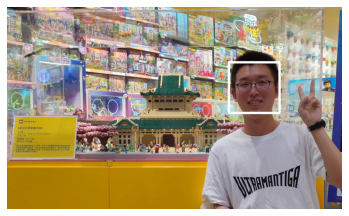

In [ ]:
def face_detection(path):  # detect face by haar_cascade
    img = cv2.imread(path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_rbg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
    face_rects = face_cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=20)
    for (x, y, w, h) in face_rects:
        cv2.rectangle(img_rbg, (x, y), (x+w, y+h), (255, 255, 255), 20)
    plt.imshow(img_rbg)
    plt.axis('off')
    plt.show()
face_detection('test_face.jpg')

**Use haar cascade classifier to detect solar panels.** 

The code requires a .xml file to tell your computer what is a solar panel look like. 

You can create your own .xml file by the way I mentioned above. My *cascade.xml* is created based on a dataset which build up by crawling. It is easy to build, but the result cannot satisfy our need sometimes. I reckon that mainly because of the weakness of the dataset. The images crawled from google are not good enough for our model. 

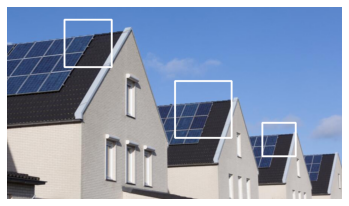

In [ ]:
def solarPanel_detection(path):  # only use haar_cascade method to detect solar panels based on data by crawling
    img = cv2.imread(path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_rbg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    solar_cascade = cv2.CascadeClassifier('cascade.xml')
    rects = solar_cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=25)
    for (x, y, w, h) in rects:
        cv2.rectangle(img_rbg, (x, y), (x+w, y+h), (255, 255, 255), 3)
    plt.imshow(img_rbg)
    plt.axis('off')
    plt.show()
solarPanel_detection('test_pv.jpg')

# Method 2: Use cvlib to detect(YOLOv3 model)

cvlib is a very useful package I found during the month. It can help us detect face, gender and many other objects with a few code. 

detect_common_objects uses YOLOv3 model trained on COCO dataset. And it contains 80 common objects. You can also train your own YOLOv3 model and apply it in this function. 


For more information aboout cvlib: 

https://github.com/arunponnusamy/cvlib

About how to train your own YOLOv3 model, you can look this: 

https://blog.insightdatascience.com/how-to-train-your-own-yolov3-detector-from-scratch-224d10e55de2

**Here is related code.**

Install cvlib. (most of the packages are already installed, you only need to install this)

In [ ]:
pip install cvlib

     |████████████████████████████████| 10.0 MB 4.3 MB/s 
  Created wheel for cvlib: filename=cvlib-0.2.6-py3-none-any.whl size=10044620 sha256=3ef46d1c269772530e20ada1ef1c6e96c3f274d12d48fe7e423857ed4bc6cc7b
  Stored in directory: /root/.cache/pip/wheels/9b/96/9b/373c07517ffe0bedbebc0813aec1e62cb2bb1dee91b3694895
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12082 sha256=609bebc2744ded4dd450e1c077966ab15ffc2f4523b406e43e00724c15f7be77
  Stored in directory: /root/.cache/pip/wheels/f0/fd/1f/3e35ed57e94cd8ced38dd46771f1f0f94f65fec548659ed855
Successfully built cvlib progressbar


import packages

In [ ]:
pip install opencv-contrib-python==3.4.13.47 --force-reinstall

     |████████████████████████████████| 53.7 MB 37 kB/s 
     |████████████████████████████████| 15.7 MB 59 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires numpy~=1.19.2, but you have numpy 1.21.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[0.9489456415176392, 0.9323872923851013, 0.9104731678962708, 0.8367693424224854, 0.819430947303772, 0.80889892578125, 0.7956622242927551, 0.7489875555038452, 0.7323426604270935, 0.6937693357467651, 0.626764714717865, 0.6194948554039001, 0.6063572764396667, 0.5146811604499817]
['person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'car', 'person', 'person', 'person']
[[332, 374, 388, 535], [258, 374, 319, 531], [516, 389, 574, 550], [46, 366, 112, 571], [456, 392, 513, 546], [95, 366, 161, 571], [152, 366, 206, 519], [199, 364, 262, 527], [566, 381, 620, 557], [824, 301, 919, 386], [731, 359, 957, 608], [683, 393, 739, 546], [374, 392, 425, 533], [420, 378, 470, 539]]


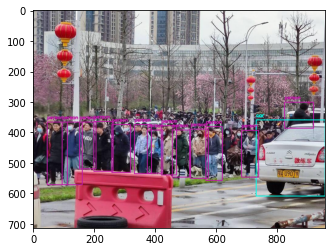

In [ ]:
def detect_common(path):  # use detect_common_objects from cvlib to detect common things
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    bbox, label, conf = cv.detect_common_objects(img, confidence=0.5)  # use cvlib to detect common objects
    output_image = draw_bbox(img, bbox, label, conf)  # draw the image
    print(conf)
    print(label)
    print(bbox)
    plt.imshow(output_image)
    plt.show()
detect_common('cvlibTest.jpg')

# Method 3: Use GoogLeNet model(from Professor Majed)
The code is from Professor Majed. If you want to run this code, first you should download two model files. You can download here.

https://github.com/AleDel/deepdreamer-touchdesigner/tree/master/models

The code is based on GooLeNet. For more information you can look these: 

https://towardsdatascience.com/deep-learning-googlenet-explained-de8861c82765
https://github.com/BVLC/caffe/tree/master/models/bvlc_googlenet

In [ ]:
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
import matplotlib.pyplot as plt
import json
import pandas as pd
import os
from skimage.io import imread
import numpy as np

In [ ]:
# Read image

# typewriter
# img = cv2.imread('../images/typewriter.jpg')
# img = cv2.imread('../images/fruit.jpg')

# equipments
# img = cv2.imread('../images/equipment2.jpg')

# buildings
# img = cv2.imread('../images/building1.jpg')
# img = cv2.imread('../images/building2.jpg')
# img = cv2.imread('../images/wc.jpg')

# pips
# img = cv2.imread('../images/pip1.jpg')
# img = cv2.imread('../images/pip2.jpg')

# solar
# img = cv2.imread('../images/solar2.jpg')
# img = cv2.imread('../images/solar3.jpg')
# img = cv2.imread('../images/solar4.jpg')
img = cv2.imread('test.jpg')
# img = cv2.imread('../images/farm1.jpg')
# img = cv2.imread('../images/farm2.jpg')

# print(img)
# Image Dimensions : (400, 640, 3)  (height, width, number_of_channels).
# there are three color channels in the image.

all_rows = open('model/synset_words.txt').read().strip().split("\n")

classes = [r[r.find(' ') + 1:] for r in all_rows]

net = cv2.dnn.readNetFromCaffe('model/bvlc_googlenet.prototxt', 'model/bvlc_googlenet.caffemodel')

blob = cv2.dnn.blobFromImage(img, 1, (224, 224))
# blob = cv2.dnn.blobFromImage(image, scalefactor=1.0, size, mean, swapRB=True)
# SEE https://www.pyimagesearch.com/2017/11/06/deep-learning-opencvs-blobfromimage-works/

net.setInput(blob)

outp = net.forward()
# print(outp)
idx = np.argsort(outp[0])[::-1][:5]

for (i, id) in enumerate(idx):
  print('{}. {} ({}): Probability {:.3}%'.format(i + 1, classes[id], id, outp[0][id] * 100))
# for (i,c) in enumerate(classes):
#    if i==4:
#        break
#    print(i,c)

# Create window with freedom of dimensions
# cv2.namedWindow('Image', cv2.WINDOW_AUTOSIZE)  # By default,
cv2.namedWindow('Image', cv2.WINDOW_NORMAL)  # you can resize window.

cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# SHOW It with resize image
imS = cv2.resize(img, (960, 540))  # Resize image
cv2.imshow("output", imS)  # Show image
cv2.waitKey(0)  # Display the image infinitely until any keypress

# img = cv2.imread('messi5.jpg',0)
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

NameError: ignored

# Method 4: Find contours directly(best to use in farm)
Since the solar panel is not a very complex object. In fact, it is just a rectangle.So maybe we can detect them in some basic ways. 

For example, we can find contours in the image. And restrict some features of the contours, then we can find out all contours that belong to solar panels. 

This simple method can be applied on **farm** since there are not so many contours except for some solar panels.And the result of the method in city is not very considerable. 

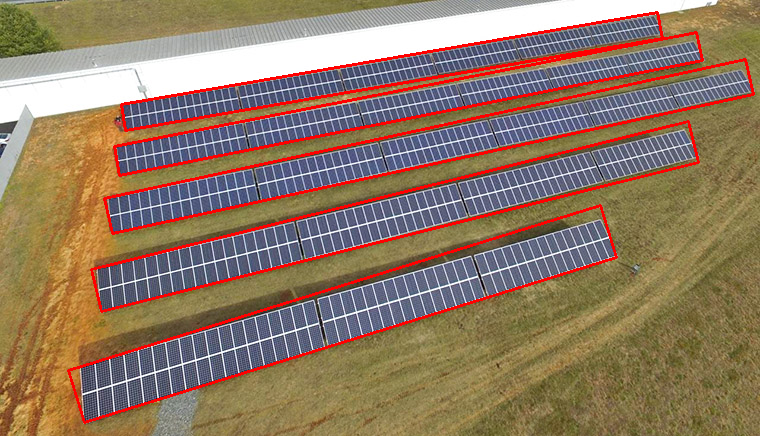

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img = cv2.imread('farm_pv.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
ret,thresh1 = cv2.threshold(hsv[:,:,0],100,255,cv2.THRESH_BINARY)
im2, contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  # find solar panels by finding contours
try: hierarchy = hierarchy[0]
except: hierarchy = []
for contour, hier in zip(contours, hierarchy):
    area = cv2.contourArea(contour)
    if area > 10000 and area < 250000:
       rect = cv2.minAreaRect(contour)
       box = cv2.boxPoints(rect)
       box = np.int0(box)
       cv2.drawContours(img,[box],0,(0,0,255),2)
cv2_imshow(img)  # cv2 is not compatible in Colab. That is a function we can replace. 
# cv2.imwrite("result.jpg",img)

# Method 5: Train CNN and some useful github project
Convolutional Neural Network is very impressive when applying it into computer vision. And you can learn it in CS231n.

You can craete your own dataset and train your model. And on the Internet, there are some good projects about CNN and solar panels detection. You definitely will learn some after you look these projects. 

https://modelzoo.co/model/mask-r-cnn-keras

https://github.com/alsombra/Mask_RCNN-TF2/tree/master/mrcnn

https://github.com/fms-santos/DeepSolar/

https://github.com/msabvid/Solar-Panels-Detection

https://github.com/top-on/projects-solar-panel-detection

PS: some projects may need tensorflow1.3 and Python2. Colab supplies tensorflow1.3, but Python2 is not supported anymore. If you have some Python2 code to run in Colab, there is no way except change your code. 

About how to train own CNN model. Please look this.

https://engineering.matterport.com/splash-of-color-instance-segmentation-with-mask-r-cnn-and-tensorflow-7c761e238b46

**Here is some examples of how to use github projects based on my own dataset and train it**

Connect google drive

In [ ]:
# connect google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# close google drive if necessary
drive.flush_and_unmount()

In [ ]:
# change the work directory
%cd /content/drive/MyDrive

**Get the project(Solar-Panels-Detection) and prepare**

Use U-net to detect solar panels

PS: need to download data from Internet in advance

In [ ]:
# get the poject
# the project will be downloaded into the work directory
# if you first connect the google drive, then the porject will also download into your google drive
!git clone https://github.com/msabvid/Solar-Panels-Detection.git

In [ ]:
# change the version of some packages to adjust the project
!pip install scipy==1.2.1

In [ ]:
# change the version of tensorflow if necessary(not necessary in this project)
%tensorflow_version 1.x

In [ ]:
%cd /content/drive/MyDrive/Solar-Panels-Detection

/content/drive/MyDrive/Solar-Panels-Detection


In [ ]:
!python /content/drive/MyDrive/Solar-Panels-Detection/src/data_loader.py

In [ ]:
!python /content/drive/MyDrive/Solar-Panels-Detection/src/utils/solar_panel_detection_california.py

**Get the project(DeepSolar) and prepare**

In [ ]:
# clone the project, already changed for different folders structures
!git clone https://github.com/fms-santos/DeepSolar.git

Cloning into 'DeepSolar'...
remote: Enumerating objects: 128, done.
remote: Total 128 (delta 0), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (128/128), 555.28 KiB | 6.77 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [ ]:
%cd /content/drive/MyDrive/DeepSolar

/content/drive/MyDrive/DeepSolar


In [ ]:
!pwd

/content/drive/My Drive/DeepSolar/ckpt


In [ ]:
# download the ImageNet data set
!mkdir ckpt
%cd /content/drive/MyDrive/DeepSolar/ckpt
!curl -O http://download.tensorflow.org/models/image/imagenet/inception-v3-2016-03-01.tar.gz
!tar xzf inception-v3-2016-03-01.tar.gz

In [ ]:
# download pre-trained model
!curl -O https://s3-us-west-1.amazonaws.com/roofsolar/inception_classification.tar.gz
!tar xzf inception_classification.tar.gz
!curl -O https://s3-us-west-1.amazonaws.com/roofsolar/inception_segmentation.tar.gz
!tar xzf inception_segmentation.tar.gz

In [ ]:
# change the version of tensorflow if necessary(not necessary in this project)
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
%cd /content/drive/MyDrive/DeepSolar

/content/drive/MyDrive/DeepSolar


In [ ]:
!python /content/drive/MyDrive/DeepSolar/generate_data_list.py

In [ ]:
!python train_classification.py --fine_tune=False

In [ ]:
!python test_classification.py

# Discussion and Conclusion
**Method 1: Haar Cascade Classifier:**

Advantages: 
1. Easy to create own dataset. Postive and negative. Don't need to label exactly. 
2. Esay to understand and try. 
3. Result is not bad. 

Disadvantages:
1. Result is not good enough. 
2. Only detect 1 object for each model. 

**Method 2: Use cvlib to detect(YOLOv3 model)**

Advantages:
1. cvlib prepared everything in advance.
2. Correct rate is high enough.
3. Detect more than one object in an image.

Disadvantages: 
1. Only detect 80 objects in default condition. 
2. If use own model, create own dataset is not easy. 

**Method 3: Use GoogLeNet model(from Professor Majed)**

Advantages: 
1. Correct rate is high enough. 
2. Can give the possibility.

Disadvantages: 
1. If want to detect other things, create own dataset is also not easy. 

**Method 4: Find contours directly(best to use in farm)**

Advantages:
1. Very easy. Only need basic knowledge of image process. 
2. Correct rate is high enough in farm. 

Disadvantages: 
1. Hard to apply in complex environment. Cannot apply for city. 

**Method 5: Train CNN and some useful github project**

Advantages:
1. High correct rate. 
2. can apply in many different environment. 

Disadvantages: 
1. Own dataset is not esay to create. Label images can be time consuming. 
2. Not easy to run if the data is huge. Require GPU. 



# Future work
For example, you can detect houses. And talk the type of them in the image. Also, you can try to calculate the scale of the rooftop. Images from a satellite view will be much easier to achieve that. And flaw detection for solar panels is also very challenging and meaningful for you to have a try. 